In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../References/DATA/cancer_classification.csv')

In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Data Analysis

In [6]:
len(df.columns)

31

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

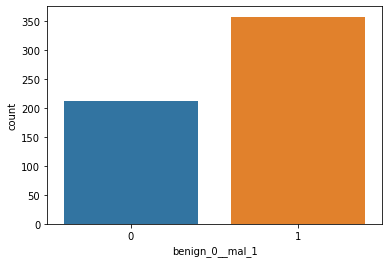

In [14]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

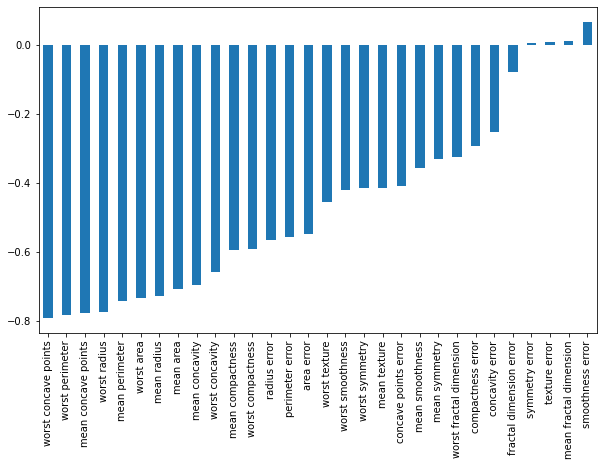

In [19]:
plt.figure(figsize=(10,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

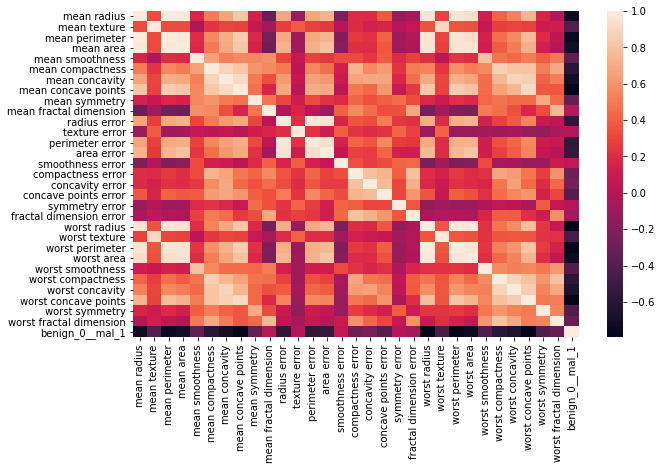

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

# Data Preparation

In [22]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [23]:
from sklearn.model_selection import train_test_split 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [30]:
X_train.shape

(426, 30)

In [31]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6809 - val_loss: 0.6664
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6582 - val_loss: 0.6405
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6343 - val_loss: 0.6100
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6030 - val_loss: 0.5720
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5643 - val_loss: 0.5207
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5130 - val_loss: 0.4617
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4602 - val_loss: 0.3992
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4020 - val_loss: 0.3390
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3515 - val_loss: 0.2908
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3107 - val_loss: 0.2551
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0546
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0682 - val_loss: 0.0524
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0536
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0568
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0542 - val_loss: 0.0527
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0565
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0539
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0544
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0516
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.0535
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.0552
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.0523
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.0519
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.0564
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0567
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.0553
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.0538
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0625
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0375 - val_loss: 0.0615
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.0546
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0619
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0616
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.0586
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0625
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.0574
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0746
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.0588
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.0753
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.0629
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0727
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0770
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0730
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0746
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0739
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0761
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0721
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0809
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0933
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0579
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.1056
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0954
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.1031
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0801
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.0903
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0838
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0982
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0939
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0877
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.1080
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0816
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0953
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0886
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1064
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.1019
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.1053
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.1066
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0985
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1378
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0866
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.1341
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.1162
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.1487
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.1213
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.1539
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.1201
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.1455
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.1312
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.1426
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.1396
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.1325
Epoc

In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

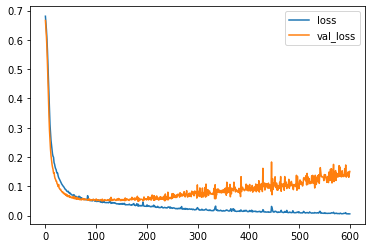

In [45]:
losses.plot()

# Handle Overfitting

When validatiomn loss increses the model is over fitted

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [40]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6786 - val_loss: 0.6473
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6359 - val_loss: 0.5938
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5836 - val_loss: 0.5370
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5358 - val_loss: 0.4805
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4823 - val_loss: 0.4211
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4296 - val_loss: 0.3640
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 0.3174
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3405 - val_loss: 0.2789
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3075 - val_loss: 0.2475
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2792 - val_loss: 0.2215
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0498
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0558 - val_loss: 0.0504
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0485
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0557 - val_loss: 0.0493
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0543 - val_loss: 0.0511
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0571 - val_loss: 0.0511
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0483
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0527 - val_loss: 0.0508
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0498
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0494
Epoch 93/600


In [43]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

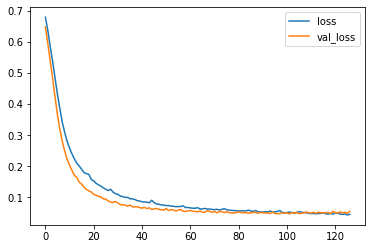

In [44]:
model_loss.plot()

## Using Dropout

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6735 - val_loss: 0.6529
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6716 - val_loss: 0.6307
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6452 - val_loss: 0.6059
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6295 - val_loss: 0.5812
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6144 - val_loss: 0.5534
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5787 - val_loss: 0.5196
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5695 - val_loss: 0.4851
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5407 - val_loss: 0.4543
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5174 - val_loss: 0.4243
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4907 - val_loss: 0.3883
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1133 - val_loss: 0.0597
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1562 - val_loss: 0.0584
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0971 - val_loss: 0.0562
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.0570
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1091 - val_loss: 0.0617
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.0573
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1173 - val_loss: 0.0597
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1148 - val_loss: 0.0579
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1311 - val_loss: 0.0580
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1081 - val_loss: 0.0546
Epoch 93/600


In [49]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

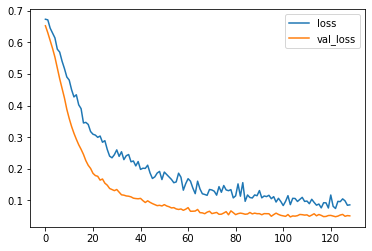

In [50]:
model_loss.plot()

# Predictions

In [52]:
predictions = model.predict_classes(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 2 87]]
